In [8]:
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from rainpy.raindrop import make_frame

# from collections import namedtuple
# drops = {"name": "example", 
#                 "floder": "./example", 
#                 "author": "zmdsn",
#                 "email":"zmdsn@126.com",
#                 "url":"https://github.com/zmdsn/rainpy"}
# RainDrop = namedtuple("RainDrop", drops.keys())
# drop = RainDrop(**drops)

# make_frame

In [ ]:
# import pandas as pd
# 读取 CSV 文件（假设文件名为 `data.csv`，且包含表头）
# df = pd.read_csv('../glory/predict/datasets/ETT-small/ETTh1.csv')
# df.describe().to_json()
# df['date']


0        2016-07-01 00:00:00
1        2016-07-01 01:00:00
2        2016-07-01 02:00:00
3        2016-07-01 03:00:00
4        2016-07-01 04:00:00
                ...         
17415    2018-06-26 15:00:00
17416    2018-06-26 16:00:00
17417    2018-06-26 17:00:00
17418    2018-06-26 18:00:00
17419    2018-06-26 19:00:00
Name: date, Length: 17420, dtype: object

In [18]:
# df.index.is_uniform()
time_diff = df.index.to_series().diff()
print("时间间隔是否一致:", time_diff.nunique() == 1)
# df.index.to_series().diff()

时间间隔是否一致: True


df.dtypes

In [ ]:
from rainpy import read
import pandas as pd
from rainpy.ts import get_datetime_column, set_datetime_index

df  = read('../glory/predict/datasets/ETT-small/ETTh1.csv')
# get_datetime_column(df)

df = set_datetime_index(df)
# df.index.to_series().diff().describe()
time_diffs = df.index.to_series().diff() # 计算相邻时间差
time_diffs[1:].unique()

/mnt/d/rainpy/src/rainpy/read.py:126: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  return function(file, *args, **filter_kwargs)


<TimedeltaArray>
['0 days 01:00:00']
Length: 1, dtype: timedelta64[ns]

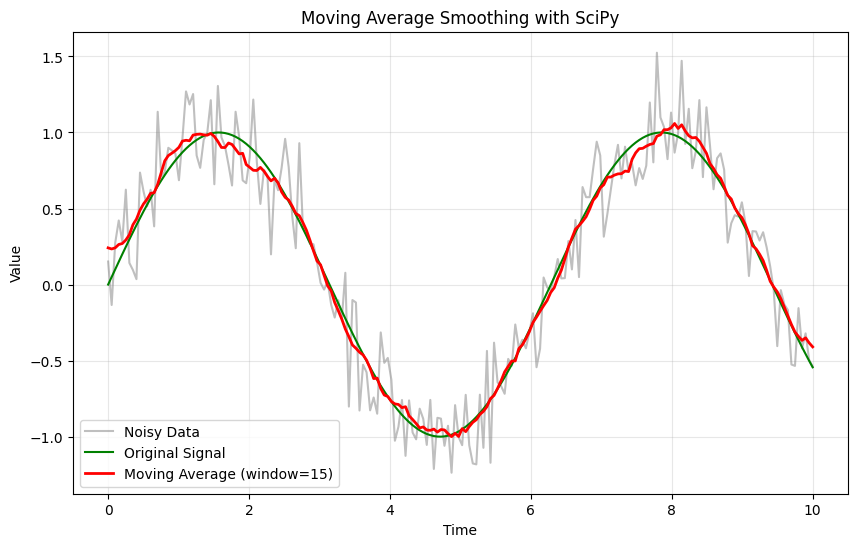

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

# Generate some noisy data
x = np.linspace(0, 10, 200)
y_clean = np.sin(x)
noise = np.random.normal(0, 0.2, size=len(x))
y_noisy = y_clean + noise

# Apply moving average smoothing
window_size = 15
y_smoothed = uniform_filter1d(y_noisy, size=window_size) 

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, y_noisy, 'gray', alpha=0.5, label='Noisy Data')
plt.plot(x, y_clean, 'g', label='Original Signal')
plt.plot(x, y_smoothed, 'r', linewidth=2, label=f'Moving Average (window={window_size})')
plt.legend()
plt.title('Moving Average Smoothing with SciPy')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)
plt.show()

/mnt/d/rainpy/src/rainpy/read.py:126: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  return function(file, *args, **filter_kwargs)


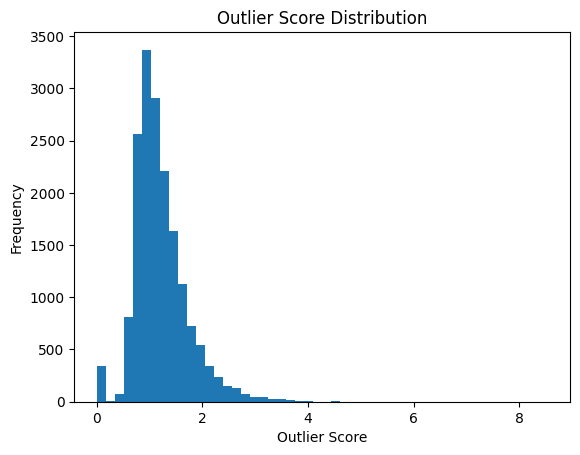

In [17]:
import pandas as pd
from rainpy import read
from rainpy.ts import get_datetime_column, set_datetime_index

data  = read('../glory/predict/datasets/ETT-small/ETTh1.csv')
data = set_datetime_index(data)

# 从CSV文件加载数据
# data = pd.read_csv('../glory/predict/datasets/ETT-small/ETTh1.csv')
from pyod.models.knn import KNN

# 创建K近邻异常检测模型
model = KNN()

# 拟合模型
model.fit(data)

# 预测异常值
outliers = model.predict(data)

# 异常值的分数
scores = model.decision_scores_
scores

import matplotlib.pyplot as plt

# 绘制异常值分数的直方图
plt.hist(scores, bins=50)
plt.xlabel('Outlier Score')
plt.ylabel('Frequency')
plt.title('Outlier Score Distribution')
plt.show()

In [20]:
from pyod.models.auto_encoder import AutoEncoder
import pandas as pd

# 加载金融交易数据（示例数据）
# transaction_data = pd.read_csv('transaction_data.csv')
transaction_data = data
# 创建AutoEncoder异常检测模型
model = AutoEncoder(hidden_neuron_list=[64, 32, 32, 64])

# 拟合模型
model.fit(transaction_data)

# 预测异常值
outliers = model.predict(transaction_data)

Training: 100%|██████████| 10/10 [00:25<00:00,  2.52s/it]


In [11]:
def analyze_sampling_quality(df, expected_freq='S'):
    """
    综合分析数据采样质量
    """
    # 计算实际时间间隔
    time_diffs = df.index.to_series().diff().dropna()
    
    # 将期望频率转换为Timedelta
    expected_interval = pd.Timedelta(expected_freq)
    
    print("=== 采样质量分析报告 ===")
    print(f"期望采样间隔: {expected_interval}")
    print(f"实际数据点数量: {len(df)}")
    print(f"时间范围: {df.index.min()} 到 {df.index.max()}")
    
    # 分析1: 时间间隔统计
    print("\n--- 时间间隔分析 ---")
    print(f"平均间隔: {time_diffs.mean()}")
    print(f"间隔标准差: {time_diffs.std()}")
    print(f"最小间隔: {time_diffs.min()}")
    print(f"最大间隔: {time_diffs.max()}")
    
    # 分析2: 缺失数据评估
    expected_count = len(pd.date_range(
        start=df.index.min(), 
        end=df.index.max(), 
        freq=expected_freq
    ))
    missing_ratio = 1 - len(df) / expected_count
    print(f"\n--- 缺失数据评估 ---")
    print(f"预期数据点: {expected_count}")
    print(f"实际数据点: {len(df)}")
    print(f"缺失比例: {missing_ratio:.2%}")
    
    # 分析3: 间隔分布
    print("\n--- 间隔分布分析 ---")
    unique_intervals = time_diffs.value_counts().head(10)
    print("最常见的10个间隔:")
    for interval, count in unique_intervals.items():
        print(f"  {interval}: {count}次 ({count/len(time_diffs):.1%})")
    
    return time_diffs, missing_ratio

analyze_sampling_quality(df)

NameError: name 'df' is not defined

In [34]:
from pandas.tseries.frequencies import infer_freq
freq = infer_freq(df.index)
print("时间频率:", freq)

时间频率: h


In [ ]:
from rainpy.ts import get_datetime_column
from rainpy import read
import pandas as pd

def set_datetime_index(df):
    datetime_col, ds_type, x = get_datetime_column(df)
    print(datetime_col, ds_type, x)
    if datetime_col:
        df[datetime_col] = pd.to_datetime(df[datetime_col])
        if ds_type in ['s', 'ms', 'us']:
            df[datetime_col] = pd.to_datetime(df[datetime_col], unit=ds_type)
            
        df.set_index(datetime_col, inplace=True)
    return df

In [2]:
import pandas as pd

# 示例数据 - 不同精度的时间戳
timestamps = {
    'seconds': [1609459200, 1609545600, 1609632000],      # 秒级
    'milliseconds': [1609459200000, 1609545600000, 1609632000000],  # 毫秒级
    'microseconds': [1609459200000000, 1609545600000000, 1609632000000000]  # 微秒级
}

df = pd.DataFrame(timestamps)

# # 转换为datetime
df['datetime_seconds'] = pd.to_datetime(df['seconds'], unit='s')
# df['datetime_ms'] = pd.to_datetime(df['milliseconds'], unit='ms')
# df['datetime_us'] = pd.to_datetime(df['microseconds'], unit='us')

# df = set_datetime_index(df)
df

,seconds,milliseconds,microseconds,datetime_seconds
0,1609459200,1609459200000,1609459200000000,2021-01-01
1,1609545600,1609545600000,1609545600000000,2021-01-02
2,1609632000,1609632000000,1609632000000000,2021-01-03


ImportError: cannot import name 'is_time_index_continuous' from 'rainpy.ts' (/mnt/d/rainpy/src/rainpy/ts.py)

In [ ]:
%load_ext autoreload
%autoreload 1
from rainpy.ts import read_data, get_datetime_column
from rainpy import read

file_path="tests/test_data/csv_utf8_t.csv"

df = read(file_path)
# get_datetime_column(df)
from rainpy.ts import is_time_index_continuous

is_time_index_continuous(df)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/mnt/d/rainpy/src/rainpy/read.py:126: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  return function(file, *args, **filter_kwargs)


ImportError: cannot import name 'is_time_index_continuous' from 'rainpy.ts' (/mnt/d/rainpy/src/rainpy/ts.py)

In [14]:

data = {
    'category': ['A', 'B', 'A', 'C', 'A', 'B', 'A', 'C', 'A'],
    'values': [1, 2, 2, 3, 2, 1, 2, 3, 2],
    'scores': [85, 90, 85, 92, 85, 90, 88, 92, 85],
    'mixed': ['X', 'Y', 'X', 'Z', 'X', 'Y', 'X', 0, 'X']
}

df = pd.DataFrame(data)

df['category'].mode()[0]  # 返回出现频率最高的值

'A'

In [1]:
# %%time
from rainpy.ts import read_data
file_path="tests/test_data/ETTh1.csv"
df = read_data(file_path)

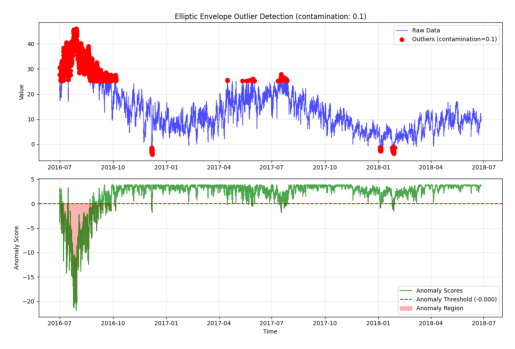

In [3]:
from rainpy.ts import *

# df_detection, image_base64 = z_score_detection(df['OT'], threshold=3, show=True)
df_detection, image_base64 = modified_zscore_detection(df['OT'], threshold=3, show=True)
# df_detection, image_base64 = lof_detection(df['OT'], n_neighbors=150, show=True)
# df_detection, image_base64 = iqr_detection(df['OT'], show=True)
df_detection, image_base64= elliptic_envelope_detection(df['OT'], show=True)

show_base64(image_base64)

In [25]:
# df['OT'].name

# from scipy.stats import shapiro
# shapiro(df['OT'])
# m = True if shapiro(df['HULL'])[1] < 0.05 else False
# m

def check_gaussian_assumption(data):
    """检查数据是否近似高斯分布"""
    result = {}
    if isinstance(data, pd.DataFrame):
        for col in data.columns:
            result[col] = True if shapiro(data[col])[1] < 0.05 else False
    elif isinstance(data, pd.Series):
        col = data.name
        result[col] = True if shapiro(data[col])[1] < 0.05 else False
    return result
check_gaussian_assumption(df)

/mnt/d/rainpy/.venv/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 17420.
  res = hypotest_fun_out(*samples, **kwds)


{'HUFL': True,
 'HULL': True,
 'MUFL': True,
 'MULL': True,
 'LUFL': True,
 'LULL': True,
 'OT': True}

In [27]:
import numpy as np
 
# 生成一组数据
data = np.random.normal(0, 1, 100)
 
# 计算均值和标准差
mean = np.mean(data)
std = np.std(data)
 
# 检测异常值
outliers = [x for x in data if np.abs(x - mean) > 3 * std]
 
print("Outliers:", outliers)

Outliers: [np.float64(-2.9786850587083746)]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, shapiro, anderson, kstest
import warnings
warnings.filterwarnings('ignore')

def check_gaussian_assumption(df, alpha=0.05, show_plots=True):
    """
    全面检查DataFrame中各列的高斯分布假设
    
    参数:
    df: pandas DataFrame
    alpha: 显著性水平
    show_plots: 是否显示分布图
    
    返回:
    results: 各列的检验结果DataFrame
    """
    
    if not isinstance(df, pd.DataFrame):
        raise ValueError("输入必须是pandas DataFrame")
    
    results = []
    
    for col in df.columns:
        # 移除缺失值
        data = df[col].dropna()
        
        if len(data) < 3:
            print(f"警告: 列 '{col}' 数据点太少 ({len(data)})，跳过检验")
            continue
        
        # 基本统计量
        n = len(data)
        mean_val = np.mean(data)
        std_val = np.std(data)
        skewness = stats.skew(data)
        kurtosis = stats.kurtosis(data)
        
        # 多种正态性检验
        # 1. Shapiro-Wilk检验 (适合小样本)
        if 3 <= n:
            shapiro_stat, shapiro_p = shapiro(data)
        else:
            shapiro_stat, shapiro_p = np.nan, np.nan
        
        # 2. D'Agostino的K^2检验 (适合各种样本量)
        dagostino_stat, dagostino_p = stats.normaltest(data)
        
        # 3. Anderson-Darling检验
        anderson_stat = anderson(data, dist='norm')
        anderson_critical = anderson_stat.critical_values[2]  # 使用5%显著性水平
        anderson_reject = anderson_stat.statistic > anderson_critical
        
        # 4. Kolmogorov-Smirnov检验
        ks_stat, ks_p = kstest(data, 'norm', args=(mean_val, std_val))
        
        # 判断是否拒绝正态性假设
        reject_shapiro = shapiro_p < alpha if not np.isnan(shapiro_p) else np.nan
        reject_dagostino = dagostino_p < alpha
        reject_ks = ks_p < alpha
        
        # 综合判断 (多数检验拒绝则认为非正态)
        tests_rejected = sum([reject_shapiro, reject_dagostino, reject_ks, anderson_reject])
        is_normal = tests_rejected >= 3  # 如果不超过1个检验拒绝，认为基本正态
        
        # 存储结果
        result = {
            'column': col,
            'n': n,
            'mean': mean_val,
            'std': std_val,
            'skewness': skewness,
            'kurtosis': kurtosis,
            'shapiro_p': shapiro_p,
            'dagostino_p': dagostino_p,
            'ks_p': ks_p,
            'anderson_stat': anderson_stat.statistic,
            'reject_shapiro': reject_shapiro,
            'reject_dagostino': reject_dagostino,
            'reject_ks': reject_ks,
            'reject_anderson': anderson_reject,
            'is_normal': is_normal,
            'normal_confidence': 'high' if tests_rejected == 0 else 'middle' if tests_rejected <= 1 else 'low'
        }
        results.append(result)
        
        # 可视化
        if show_plots:
            _plot_normality_check(data, col, result)
    
    # 创建结果DataFrame
    results_df = pd.DataFrame(results)
    
    # 打印总结报告
    _print_summary_report(results_df, alpha)
    
    return results_df

def _plot_normality_check(data, col_name, result, figsize=(15, 4)):
    """Plot normality test charts"""
    fig, axes = plt.subplots(1, 3, figsize=figsize)
    fig.suptitle(f'Normality Test - {col_name} (Normal: {result["is_normal"]})', fontsize=14)
    
    # 1. Histogram + Normal curve
    axes[0].hist(data, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    
    # Add normal distribution curve
    xmin, xmax = axes[0].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, result['mean'], result['std'])
    axes[0].plot(x, p, 'r-', linewidth=2, label='Normal Distribution')
    axes[0].set_title(f'Distribution Histogram\nSkewness: {result["skewness"]:.3f}, Kurtosis: {result["kurtosis"]:.3f}')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # 2. Q-Q plot
    stats.probplot(data, dist="norm", plot=axes[1])
    axes[1].set_title('Q-Q Plot')
    axes[1].grid(True, alpha=0.3)
    
    # 3. Box plot
    axes[2].boxplot(data)
    axes[2].set_title('Box Plot')
    axes[2].set_ylabel('Value')
    axes[2].grid(True, alpha=0.3)
    
    # Add test results text
    text_str = f"""Test Results:
Shapiro-Wilk: p={result['shapiro_p']:.4f}
D'Agostino: p={result['dagostino_p']:.4f}
K-S: p={result['ks_p']:.4f}
Anderson: stat={result['anderson_stat']:.3f}
Normality: {result['is_normal']}
Confidence: {result['normal_confidence']}"""
    
    axes[2].text(1.1, 0.5, text_str, transform=axes[2].transAxes, verticalalignment='center',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()

def _print_summary_report(results_df, alpha):
    """打印总结报告"""
    print("=" * 80)
    print("高斯分布假设检验总结报告")
    print("=" * 80)
    
    normal_cols = results_df[results_df['is_normal']]['column'].tolist()
    non_normal_cols = results_df[~results_df['is_normal']]['column'].tolist()
    
    print(f"\n📊 数据概览:")
    print(f"总列数: {len(results_df)}")
    print(f"符合正态分布: {len(normal_cols)} 列")
    print(f"不符合正态分布: {len(non_normal_cols)} 列")
    print(f"显著性水平: α = {alpha}")
    
    if normal_cols:
        print(f"\n✅ 符合正态分布的列: {normal_cols}")
    
    if non_normal_cols:
        print(f"\n❌ 不符合正态分布的列: {non_normal_cols}")
    
    print(f"\n📈 统计量范围:")
    print(f"偏度范围: [{results_df['skewness'].min():.3f}, {results_df['skewness'].max():.3f}]")
    print(f"峰度范围: [{results_df['kurtosis'].min():.3f}, {results_df['kurtosis'].max():.3f}]")
    
    # 正态性建议
    print(f"\n💡 建议:")
    normal_ratio = len(normal_cols) / len(results_df)
    if normal_ratio >= 0.8:
        print("大部分数据符合正态分布，适合使用基于高斯假设的算法")
    elif normal_ratio >= 0.5:
        print("约一半数据符合正态分布，可考虑数据变换或使用鲁棒算法")
    else:
        print("大部分数据不符合正态分布，建议使用非参数方法")

def check_elliptic_envelope_suitability(df, threshold=0.6):
    """
    检查数据是否适合使用Elliptic Envelope算法
    
    参数:
    df: pandas DataFrame
    threshold: 适合度的阈值 (0-1之间)
    """
    results = check_gaussian_assumption(df, show_plots=False)
    
    normal_ratio = len(results[results['is_normal']]) / len(results)
    
    print("=" * 60)
    print("Elliptic Envelope 算法适用性评估")
    print("=" * 60)
    
    print(f"数据维度: {df.shape[1]} 维")
    print(f"正态分布列比例: {normal_ratio:.1%}")
    print(f"评估阈值: {threshold:.1%}")
    
    if normal_ratio >= threshold:
        suitability = "✅ 适合"
        recommendation = "数据基本符合高斯分布假设，可以放心使用Elliptic Envelope"
    elif normal_ratio >= threshold * 0.7:
        suitability = "⚠️ 部分适合"
        recommendation = "部分数据偏离正态分布，建议进行数据变换或使用鲁棒参数"
    else:
        suitability = "❌ 不适合"
        recommendation = "数据严重偏离正态分布，建议使用Isolation Forest或LOF等非参数方法"
    
    print(f"适用性: {suitability}")
    print(f"建议: {recommendation}")
    
    return normal_ratio >= threshold


check_gaussian_assumption(df)




NameError: name 'df' is not defined

In [38]:
check_gaussian_assumption(df, alpha=0.05, show=False)

TypeError: check_gaussian_assumption() got an unexpected keyword argument 'show'